<a href="https://colab.research.google.com/github/beepmo/gator/blob/main/data/presentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install impedance -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 kB 835.4 kB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from google.colab import userdata
import plotly.express as px
from impedance import preprocessing
from impedance.models.circuits import CustomCircuit


# 1. Set up project in runtime
Create colab secrets for the following credentials for the repo to get runtime files and clone repo

In [3]:
!git config --global user.email {userdata.get('email')}
!git config --global user.name {userdata.get('name')}
!git clone https://{userdata.get('token')}@github.com/beepmo/gator
%pwd

Cloning into 'gator'...
remote: Enumerating objects: 1626, done.
remote: Counting objects: 100% (215/215), done.
remote: Compressing objects: 100% (197/197), done.
remote: Total 1626 (delta 140), reused 17 (delta 17), pack-reused 1411 (from 1)
Receiving objects: 100% (1626/1626), 112.60 MiB | 17.80 MiB/s, done.
Resolving deltas: 100% (962/962), done.
Updating files: 100% (196/196), done.


'/content'

In [30]:
%cd "/content/gator/data/"

/content/gator/data


### Blue sample : High to low

In [28]:
def nyquist_and_fit(filename):
  freqs, Z = preprocessing.readZPlot(filename)

  circuit = 'p(R0-W0,C0)'
  init = [10**6, 10**-7, 10**-8]

  circuit = CustomCircuit(circuit, initial_guess=init)
  circuit.fit(freqs, Z)
  Z_fit = circuit.predict(freqs)

  data = plt.plot(Z.real, -Z.imag, '.')
  plt.plot(Z_fit.real, -Z_fit.imag, '-', color=data[0].get_color())
  plt.ylabel('Imaginary')
  plt.xlabel('Real')

  print(circuit)

/content/gator/data

Circuit string: p(R0-W0,C0)
Fit: True

Initial guesses:
     R0 = 1.00e+06 [Ohm]
     W0 = 1.00e-07 [Ohm sec^-1/2]
     C0 = 1.00e-08 [F]

Fit parameters:
     R0 = 1.15e+06  (+/- 6.90e-24) [Ohm]
     W0 = 2.45e+05  (+/- 1.56e-24) [Ohm sec^-1/2]
     C0 = 5.62e-12  (+/- 3.34e-10) [F]


Circuit string: p(R0-W0,C0)
Fit: True

Initial guesses:
     R0 = 1.00e+06 [Ohm]
     W0 = 1.00e-07 [Ohm sec^-1/2]
     C0 = 1.00e-08 [F]

Fit parameters:
     R0 = 1.19e+07  (+/- 1.04e-24) [Ohm]
     W0 = 5.44e+06  (+/- 3.15e-25) [Ohm sec^-1/2]
     C0 = 1.86e-11  (+/- 7.09e-10) [F]


Circuit string: p(R0-W0,C0)
Fit: True

Initial guesses:
     R0 = 1.00e+06 [Ohm]
     W0 = 1.00e-07 [Ohm sec^-1/2]
     C0 = 1.00e-08 [F]

Fit parameters:
     R0 = 9.69e+06  (+/- 1.47e-24) [Ohm]
     W0 = 4.24e+06  (+/- 5.13e-25) [Ohm sec^-1/2]
     C0 = 2.98e-11  (+/- 7.69e-10) [F]


Circuit string: p(R0-W0,C0)
Fit: True

Initial guesses:
     R0 = 1.00e+06 [Ohm]
     W0 = 1.00e-07 [Ohm sec^-1/2]
   

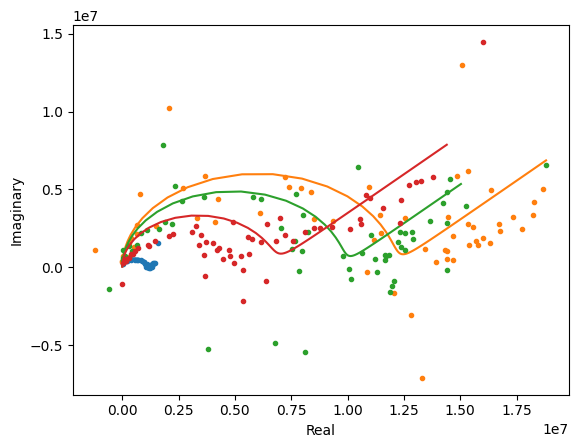

In [46]:
%cd "/content/gator/data/"
nyquist_and_fit('06-20/LiTao3_htol.z')
nyquist_and_fit('06-24/LiTao3_Blue.z')
nyquist_and_fit('06-24/LiTao3_Blackltoh.z')
nyquist_and_fit('07-30/GY1_htol.z')

/content/gator/data

Circuit string: p(R0-W0,C0)
Fit: True

Initial guesses:
     R0 = 1.00e+06 [Ohm]
     W0 = 1.00e-07 [Ohm sec^-1/2]
     C0 = 1.00e-08 [F]

Fit parameters:
     R0 = 1.15e+06  (+/- 6.90e-24) [Ohm]
     W0 = 2.45e+05  (+/- 1.56e-24) [Ohm sec^-1/2]
     C0 = 5.62e-12  (+/- 3.34e-10) [F]



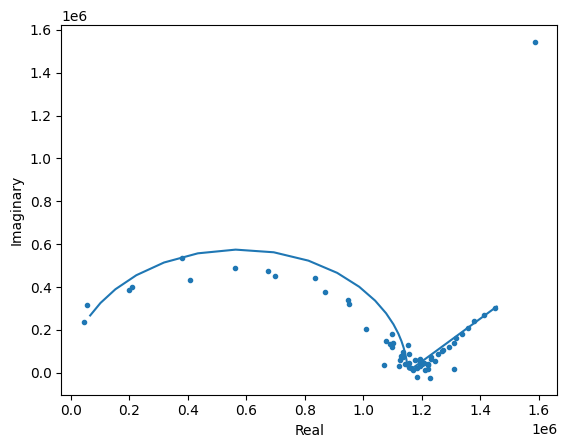

In [48]:
%cd "/content/gator/data/"
nyquist_and_fit('06-20/LiTao3_htol.z')
# nyquist_and_fit('06-24/LiTao3_Blue.z')
# nyquist_and_fit('06-24/LiTao3_Blackltoh.z')
# nyquist_and_fit('07-30/GY1_htol.z')

In [39]:
%cd '..'
%cd '06-20'
%ls

/content/gator/data
/content/gator/data/06-20
0620_eis_05_LiTaO.z  0620_eis_LNO_02.z  defbuffer1_0620_124209.csv  LiTao3_ltoh.z
0620_eis_06_LiTaO.z  0620_eis_LNO_03.z  litao3_gating.ipynb         ltao_eis.ipynb
0620_eis_LNO_01.z    0620_eis_LNO_04.z  LiTao3_htol.z               polarization.csv


### Blue sample : Low to high

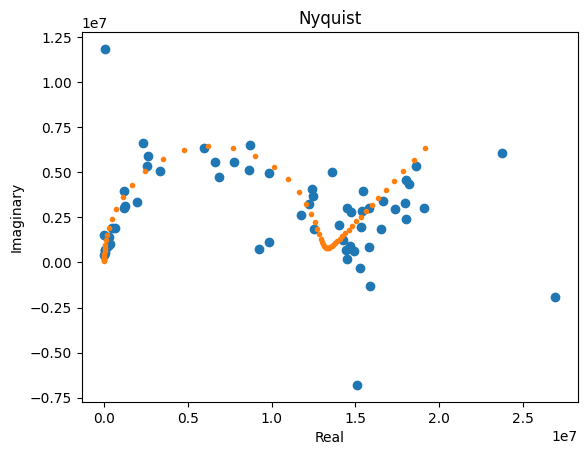

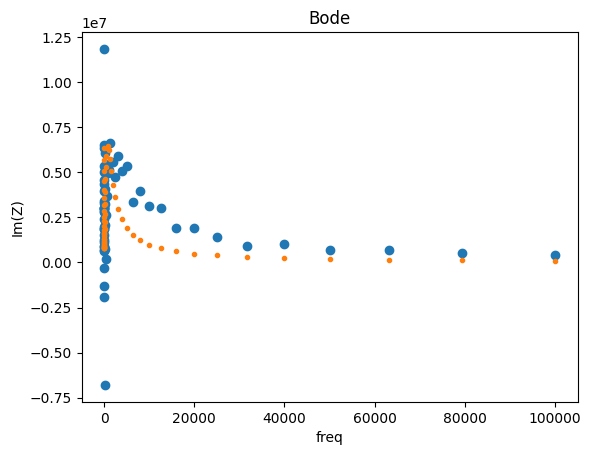

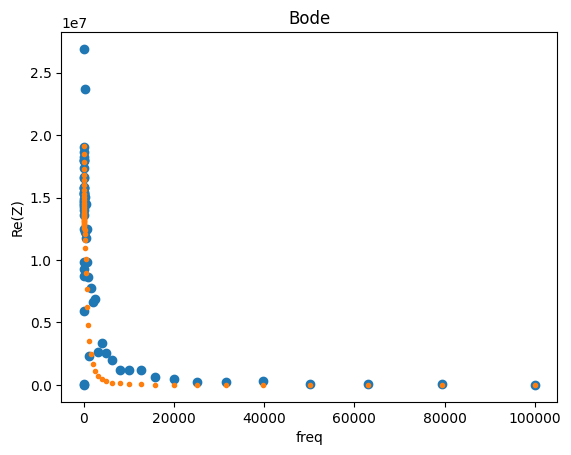

In [8]:
freqs, Z = preprocessing.readZPlot('LiTao3_Blueltoh.z')

circuit = 'p(R0-W0,C0)'
init = [10**6, 10**-7, 10**-8]

circuit = CustomCircuit(circuit, initial_guess=init)
circuit.fit(freqs, Z)
Z_fit = circuit.predict(freqs)

plt.plot(Z.real, -Z.imag, 'o')
plt.plot(Z_fit.real, -Z_fit.imag, '.')
plt.ylabel('Imaginary')
plt.xlabel('Real')
plt.title('Nyquist')
plt.show()

plt.plot(freqs, -Z.imag, 'o')
plt.plot(freqs, -Z_fit.imag, '.')
plt.ylabel('Im(Z)')
plt.xlabel('freq')
plt.title('Bode')
plt.show()

plt.plot(freqs, Z.real, 'o')
plt.plot(freqs, Z_fit.real, '.')
plt.ylabel('Re(Z)')
plt.xlabel('freq')
plt.title('Bode')
plt.show()

In [9]:
print(circuit)


Circuit string: p(R0-W0,C0)
Fit: True

Initial guesses:
     R0 = 1.00e+06 [Ohm]
     W0 = 1.00e-07 [Ohm sec^-1/2]
     C0 = 1.00e-08 [F]

Fit parameters:
     R0 = 1.28e+07  (+/- 9.89e-25) [Ohm]
     W0 = 5.04e+06  (+/- 3.20e-25) [Ohm sec^-1/2]
     C0 = 1.60e-11  (+/- 7.20e-10) [F]



### Black sample : High to low

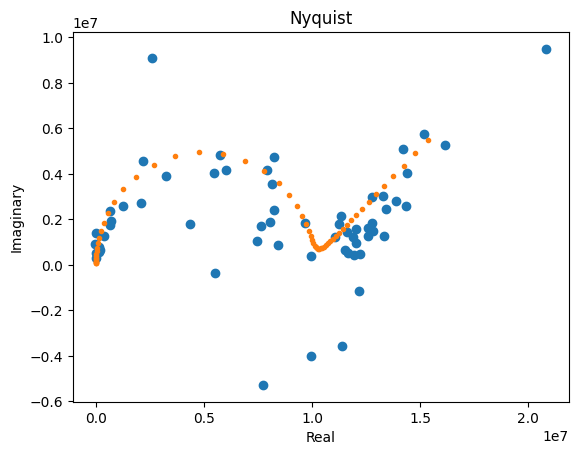

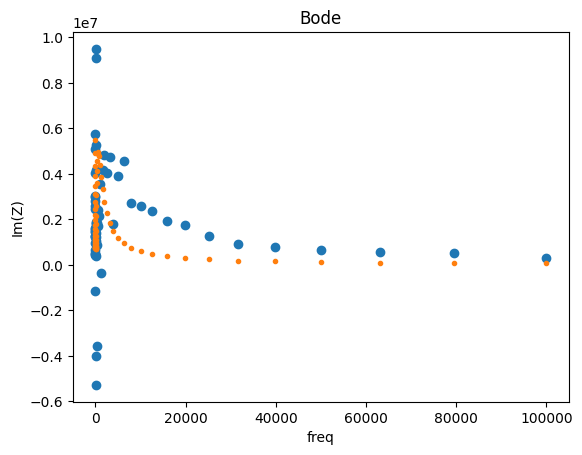

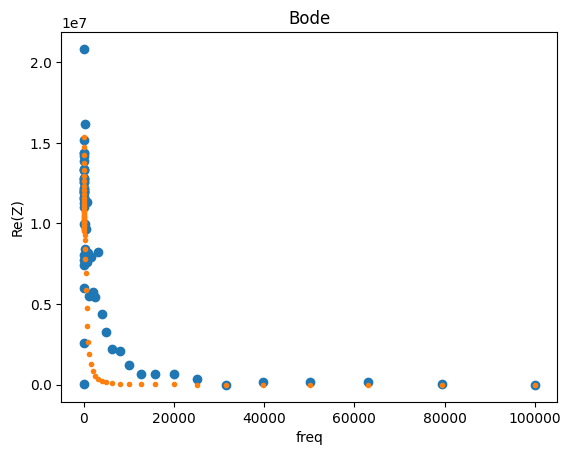


Circuit string: p(R0-W0,C0)
Fit: True

Initial guesses:
     R0 = 1.00e+06 [Ohm]
     W0 = 1.00e-07 [Ohm sec^-1/2]
     C0 = 1.00e-08 [F]

Fit parameters:
     R0 = 9.87e+06  (+/- 1.54e-24) [Ohm]
     W0 = 4.35e+06  (+/- 5.52e-25) [Ohm sec^-1/2]
     C0 = 2.63e-11  (+/- 8.29e-10) [F]



In [10]:
freqs, Z = preprocessing.readZPlot('LiTao3_Blackhtol.z')

circuit = 'p(R0-W0,C0)'
init = [10**6, 10**-7, 10**-8]

circuit = CustomCircuit(circuit, initial_guess=init)
circuit.fit(freqs, Z)
Z_fit = circuit.predict(freqs)

plt.plot(Z.real, -Z.imag, 'o')
plt.plot(Z_fit.real, -Z_fit.imag, '.')
plt.ylabel('Imaginary')
plt.xlabel('Real')
plt.title('Nyquist')
plt.show()

plt.plot(freqs, -Z.imag, 'o')
plt.plot(freqs, -Z_fit.imag, '.')
plt.ylabel('Im(Z)')
plt.xlabel('freq')
plt.title('Bode')
plt.show()

plt.plot(freqs, Z.real, 'o')
plt.plot(freqs, Z_fit.real, '.')
plt.ylabel('Re(Z)')
plt.xlabel('freq')
plt.title('Bode')
plt.show()

print(circuit)

### Black sample : Low to high

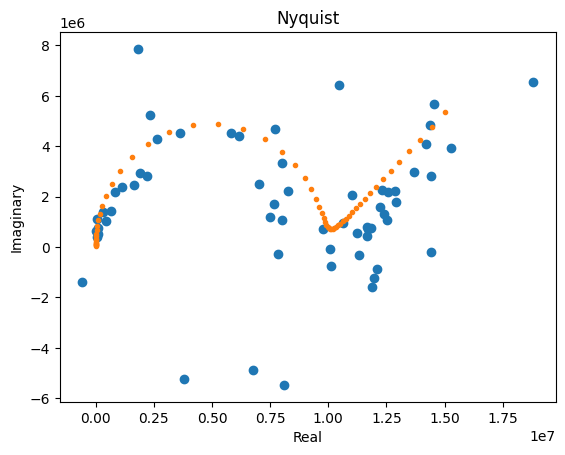

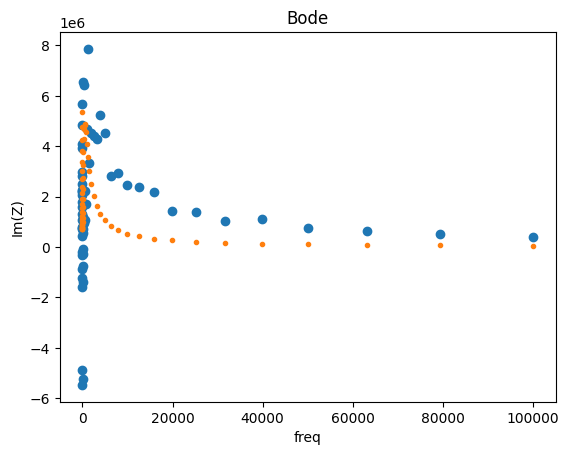

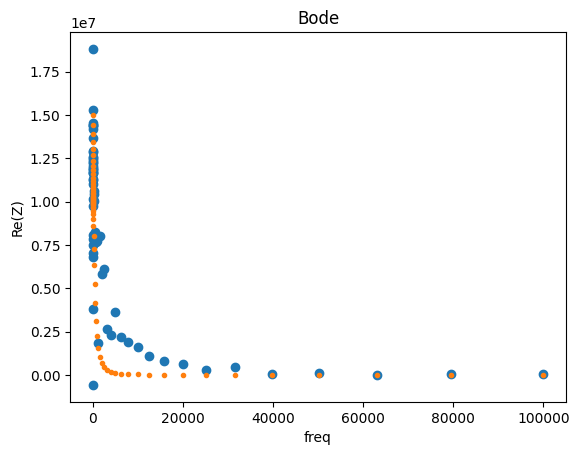


Circuit string: p(R0-W0,C0)
Fit: True

Initial guesses:
     R0 = 1.00e+06 [Ohm]
     W0 = 1.00e-07 [Ohm sec^-1/2]
     C0 = 1.00e-08 [F]

Fit parameters:
     R0 = 9.69e+06  (+/- 1.47e-24) [Ohm]
     W0 = 4.24e+06  (+/- 5.13e-25) [Ohm sec^-1/2]
     C0 = 2.98e-11  (+/- 7.69e-10) [F]



In [11]:
freqs, Z = preprocessing.readZPlot('LiTao3_Blackltoh.z')

circuit = 'p(R0-W0,C0)'
init = [10**6, 10**-7, 10**-8]

circuit = CustomCircuit(circuit, initial_guess=init)
circuit.fit(freqs, Z)
Z_fit = circuit.predict(freqs)

plt.plot(Z.real, -Z.imag, 'o')
plt.plot(Z_fit.real, -Z_fit.imag, '.')
plt.ylabel('Imaginary')
plt.xlabel('Real')
plt.title('Nyquist')
plt.show()

plt.plot(freqs, -Z.imag, 'o')
plt.plot(freqs, -Z_fit.imag, '.')
plt.ylabel('Im(Z)')
plt.xlabel('freq')
plt.title('Bode')
plt.show()

plt.plot(freqs, Z.real, 'o')
plt.plot(freqs, Z_fit.real, '.')
plt.ylabel('Re(Z)')
plt.xlabel('freq')
plt.title('Bode')
plt.show()

print(circuit)

We can see a semi-circle and a 45° slope, which is characteristic of de Warburg diffusion